imports and read in data

In [1]:

#imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from scipy.stats import uniform

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
pd.set_option('display.max_rows', 150)

In [4]:
df = pd.read_csv('../datasets/main.csv')

In [5]:
df.head()

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,year_in,month_in,day_in,year_out,month_out,day_out,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,prev_relocate,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out
0,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-12-19 10:21:00,2014-12-20 16:35:00,2014,12,Friday,2014,12,Saturday,0,0,1,0,0,0,0,7.0,7.0,Neutered Male,Neutered Male,1,1,8700 Research Blvd in Austin (TX),Scamp,Scamp
1,A006100,Dog,yellow white,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-03-07 14:26:00,2014-03-08 17:10:00,2014,3,Friday,2014,3,Saturday,0,0,0,0,0,0,0,6.0,6.0,Neutered Male,Neutered Male,1,1,8700 Research in Austin (TX),Scamp,Scamp
2,A047759,Dog,tricolor,dachshund,Owner Surrender,Transfer,Normal,Partner,2014-04-02 15:55:00,2014-04-07 15:12:00,2014,4,Wednesday,2014,4,Monday,0,0,0,0,0,0,0,1.0,1.0,Neutered Male,Neutered Male,1,1,Austin (TX),Oreo,Oreo
3,A134067,Dog,brown white,sheepdog shetland,Public Assist,Return to Owner,Injured,Unknown,2013-11-16 09:02:00,2013-11-16 11:54:00,2013,11,Saturday,2013,11,Saturday,0,0,0,0,0,0,0,1.0,1.0,Neutered Male,Neutered Male,1,1,12034 Research Blvd in Austin (TX),Bandit,Bandit
4,A141142,Dog,white black,retriever labrador bull pit,Stray,Return to Owner,Aged,Unknown,2013-11-16 14:46:00,2013-11-17 11:40:00,2013,11,Saturday,2013,11,Sunday,0,0,0,0,0,0,0,1.0,1.0,Spayed Female,Spayed Female,1,1,Austin (TX),Bettie,Bettie


In [6]:
df['breed'].value_counts()

domestic shorthair mix                30788
pit bull mix                           8431
domestic shorthair                     8306
retriever labrador mix                 6907
chihuahua shorthair mix                6223
                                      ...  
kelpie sharpei australian chinese         1
french miniature bulldog schnauzer        1
parson yorkshire russell terrier          1
poodle standard spaniel cocker            1
hound redbone catahoula                   1
Name: breed, Length: 2108, dtype: int64

In [7]:
breed = df['breed']

In [8]:
breed

0                spinone italiano mix
1                spinone italiano mix
2                           dachshund
3                   sheepdog shetland
4         retriever labrador bull pit
                     ...             
127139         retriever labrador mix
127140         retriever labrador mix
127141                            bat
127142                            bat
127143                            fox
Name: breed, Length: 127144, dtype: object

In [9]:
df['color'].value_counts()

white black                 16795
black                       10756
brown tabby                  7226
brown white                  6714
tan white                    5777
                            ...  
blue cream buff                 1
agouti cream                    1
brown blue cream brindle        1
gold buff                       1
tortie point cream              1
Name: color, Length: 373, dtype: int64

In [10]:
color = df['color']

In [11]:
color

0         yellow white
1         yellow white
2             tricolor
3          brown white
4          white black
              ...     
127139           brown
127140           brown
127141           brown
127142           brown
127143           brown
Name: color, Length: 127144, dtype: object

In [12]:
cvec = CountVectorizer( )

In [13]:
c_breed = cvec.fit_transform(breed)

In [14]:
c_color = cvec.fit_transform(color)

In [15]:
km = KMeans(n_clusters=30)

In [16]:
km.fit(c_breed)

KMeans(n_clusters=30)

In [18]:
km.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02608142,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
km.labels_

array([ 5,  5, 19, ..., 16, 16,  7])

In [24]:
silhouette_score(c_breed, km.labels_)

0.6378088211888134

In [89]:
test = pd.DataFrame(breed)

In [90]:
test['cluster'] = km.labels_

In [91]:
test

,breed,cluster
0,spinone italiano mix,3
1,spinone italiano mix,3
2,dachshund,15
3,sheepdog shetland,0
4,retriever labrador bull pit,16
...,...,...
127139,retriever labrador mix,5
127140,retriever labrador mix,5
127141,bat,13
127142,bat,13


In [92]:
test['cluster'].value_counts().sort_index()

0      5600
1     30807
2       529
3     12713
4      4058
5      6907
6      6223
7      8754
8      6320
9      1558
10     1311
11     1511
12     4021
13     1599
14     2783
15     1865
16     3080
17     1418
18     1109
19     8372
20      910
21     1049
22     1203
23     4371
24     1863
25     1739
26     1209
27     2798
28      683
29      781
Name: cluster, dtype: int64

In [93]:
test.sort_values(by='cluster').head(200)

,breed,cluster
127143,fox,0
102032,pointer,0
102037,opossum,0
102038,raccoon,0
6564,raccoon,0
...,...,...
101737,sh rabbit,0
39835,papillon,0
101767,abyssinian,0
51769,rottweiler,0


In [25]:
km = KMeans(n_clusters=20)

In [26]:
km.fit(c_color)

KMeans(n_clusters=20)

In [27]:
silhouette_score(c_color, km.labels_)

0.666093700481587

In [123]:
km.cluster_centers_

array([[2.32817087e-03, 7.89553599e-03, 0.00000000e+00, 2.76951108e-01,
        3.94776799e-03, 0.00000000e+00, 5.53699767e-02, 0.00000000e+00,
        6.53912339e-02, 2.02449641e-04, 3.00637716e-02, 3.00637716e-02,
        2.07510882e-02, 9.11023383e-02, 7.38941188e-03, 1.44751493e-02,
        2.02449641e-03, 6.91365523e-02, 2.65209029e-02, 7.08573742e-04,
        4.45389209e-03, 1.77447110e-01, 0.00000000e+00, 0.00000000e+00,
        6.05324426e-02, 4.86891386e-02, 9.92003239e-03, 1.51837230e-03,
        2.02449641e-04, 0.00000000e+00, 1.20457536e-02, 1.11347302e-03,
        1.45358842e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.87529102e-02],
       [0.00000000e+00, 4.76474092e-04, 0.00000000e+00, 7.86182251e-03,
        1.44014294e-01, 1.00000000e+00, 1.42942228e-03, 0.00000000e+00,
        3.21620012e-03, 7.50446694e-03, 2.73972603e-03, 0.00000000e+00,
        9.52948183e-04, 1.41751042e-02, 1.07206671e-03, 0.00000000e+00,
        2.38237046e-04, 0.00000000e+00,

In [124]:
km.labels_

array([12, 12, 17, ...,  1,  1,  1])

In [125]:
test['color'] = df['color']

In [126]:
test['color_cluster'] = km.labels_

In [127]:
test['color_cluster'].value_counts().sort_index()

0      9879
1      8395
2      6875
3     17230
4      6037
5      2557
6      8309
7      7369
8      4286
9     13725
10     3657
11     2444
12    10079
13     5777
14     5361
15     5332
16     1875
17     3101
18     2219
19     2637
Name: color_cluster, dtype: int64

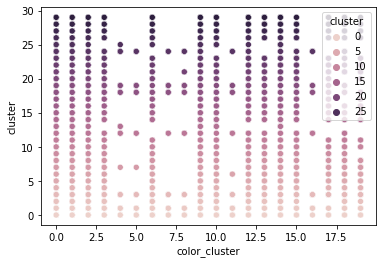

In [131]:
sns.scatterplot(x='color_cluster', y='cluster', hue='cluster', data=test);

In [128]:
test['animal_type'] = df['animal_type']

test.head()

,breed,cluster,color,color_cluster,animal_type
0,spinone italiano mix,3,yellow white,12,Dog
1,spinone italiano mix,3,yellow white,12,Dog
2,dachshund,15,tricolor,17,Dog
3,sheepdog shetland,0,brown white,2,Dog
4,retriever labrador bull pit,16,white black,3,Dog


In [117]:
unique_breed_cluster = sorted(set(zip(test['cluster'], test['breed'])))

In [118]:
unique_breed_cluster

[(0, 'abyssinian'),
 (0, 'affenpinscher'),
 (0, 'affenpinscher bruss griffon'),
 (0, 'akbash'),
 (0, 'akita'),
 (0, 'akita alaskan malamute'),
 (0, 'alaskan malamute'),
 (0, 'american'),
 (0, 'american foxhound'),
 (0, 'american sable'),
 (0, 'angora siamese'),
 (0, 'angora turkish'),
 (0, 'angora-satin'),
 (0, 'argentino dogo'),
 (0, 'armadillo'),
 (0, 'balinese'),
 (0, 'bantam'),
 (0, 'barred rock'),
 (0, 'basenji'),
 (0, 'basenji beagle'),
 (0, 'basenji chow'),
 (0, 'basenji dog carolina'),
 (0, 'basenji kelpie australian'),
 (0, 'basenji pointer'),
 (0, 'basenji ridgeback rhod'),
 (0, 'basenji sheepdog shetland'),
 (0, 'basenji staffordshire'),
 (0, 'beagle'),
 (0, 'beagle american foxhound'),
 (0, 'beagle borzoi'),
 (0, 'beagle english bulldog'),
 (0, 'beagle feist'),
 (0, 'beagle harrier'),
 (0, 'beagle heeler queensland'),
 (0, 'beagle mouth cur black'),
 (0, 'beagle pekingese'),
 (0, 'beagle pinsch doberman'),
 (0, 'beagle pointer'),
 (0, 'beagle pomeranian'),
 (0, 'beagle pug'

In [129]:
unique_color_cluster = sorted(set(zip(test['color_cluster'], test['color'])))

In [130]:
unique_color_cluster

[(0, 'agouti'),
 (0, 'apricot'),
 (0, 'blue'),
 (0, 'blue chocolate tick'),
 (0, 'blue fawn'),
 (0, 'blue gray'),
 (0, 'blue gray merle'),
 (0, 'blue gray smoke'),
 (0, 'blue liver'),
 (0, 'blue merle'),
 (0, 'blue orange'),
 (0, 'blue point'),
 (0, 'blue point cream'),
 (0, 'blue silver'),
 (0, 'blue smoke'),
 (0, 'blue tick'),
 (0, 'blue tiger'),
 (0, 'blue yellow'),
 (0, 'blue yellow brindle'),
 (0, 'buff'),
 (0, 'chocolate'),
 (0, 'chocolate fawn'),
 (0, 'chocolate gold'),
 (0, 'chocolate gray'),
 (0, 'chocolate point'),
 (0, 'chocolate silver'),
 (0, 'fawn'),
 (0, 'gold'),
 (0, 'gold buff'),
 (0, 'gold silver'),
 (0, 'gray'),
 (0, 'gray agouti'),
 (0, 'gray buff'),
 (0, 'gray fawn'),
 (0, 'gray gold'),
 (0, 'gray pink'),
 (0, 'gray point lilac'),
 (0, 'gray sable'),
 (0, 'gray silver'),
 (0, 'gray torbie'),
 (0, 'green'),
 (0, 'green blue'),
 (0, 'green gold'),
 (0, 'green gray'),
 (0, 'green silver'),
 (0, 'green yellow'),
 (0, 'liver'),
 (0, 'liver buff'),
 (0, 'liver chocolate'

In [142]:
for i, j in unique_color_cluster:
    
    print(j)

agouti
apricot
blue
blue chocolate tick
blue fawn
blue gray
blue gray merle
blue gray smoke
blue liver
blue merle
blue orange
blue point
blue point cream
blue silver
blue smoke
blue tick
blue tiger
blue yellow
blue yellow brindle
buff
chocolate
chocolate fawn
chocolate gold
chocolate gray
chocolate point
chocolate silver
fawn
gold
gold buff
gold silver
gray
gray agouti
gray buff
gray fawn
gray gold
gray pink
gray point lilac
gray sable
gray silver
gray torbie
green
green blue
green gold
green gray
green silver
green yellow
liver
liver buff
liver chocolate
liver chocolate tick
liver tick
lynx blue point
lynx gray point
lynx gray point silver
lynx gray point tabby
lynx point
lynx point silver
pink
point flame
point lilac
sable
sable buff
seal chocolate point
seal gray point
seal point
seal point buff
silver
torbie
torbie tabby silver
yellow
yellow brindle
yellow buff
yellow chocolate
yellow gold
yellow gray
yellow orange
brown
brown apricot
brown blue
brown blue brindle
brown blue cream 

In [153]:
for i in range(km.n_clusters):
     print(i)
         for ind in km.cluster_centers_[ :10]:


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [104]:
#trying modelling with clustered breeeds and colors

In [35]:
df['cluster'] = test['cluster']

In [194]:
df['color'] = test['color']

In [196]:
df.head()

,animal_id_in,animal_type,color,breed,intake_type,outcome_type,intake_condition,outcome_subtype,datetime_in,datetime_out,year_in,month_in,day_in,year_out,month_out,day_out,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,prev_relocate,age_upon_outcome,age_upon_intake,sex_upon_intake,sex_upon_outcome,is_named_in,is_named_out,found_location,name_in,name_out,cluster
0,A006100,Dog,18,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-12-19 10:21:00,2014-12-20 16:35:00,2014,12,Friday,2014,12,Saturday,0,0,1,0,0,0,0,7.0,7.0,Neutered Male,Neutered Male,1,1,8700 Research Blvd in Austin (TX),Scamp,Scamp,1
1,A006100,Dog,18,spinone italiano mix,Public Assist,Return to Owner,Normal,Unknown,2014-03-07 14:26:00,2014-03-08 17:10:00,2014,3,Friday,2014,3,Saturday,0,0,0,0,0,0,0,6.0,6.0,Neutered Male,Neutered Male,1,1,8700 Research in Austin (TX),Scamp,Scamp,1
2,A047759,Dog,16,dachshund,Owner Surrender,Transfer,Normal,Partner,2014-04-02 15:55:00,2014-04-07 15:12:00,2014,4,Wednesday,2014,4,Monday,0,0,0,0,0,0,0,1.0,1.0,Neutered Male,Neutered Male,1,1,Austin (TX),Oreo,Oreo,16
3,A134067,Dog,0,sheepdog shetland,Public Assist,Return to Owner,Injured,Unknown,2013-11-16 09:02:00,2013-11-16 11:54:00,2013,11,Saturday,2013,11,Saturday,0,0,0,0,0,0,0,1.0,1.0,Neutered Male,Neutered Male,1,1,12034 Research Blvd in Austin (TX),Bandit,Bandit,13
4,A141142,Dog,4,retriever labrador bull pit,Stray,Return to Owner,Aged,Unknown,2013-11-16 14:46:00,2013-11-17 11:40:00,2013,11,Saturday,2013,11,Sunday,0,0,0,0,0,0,0,1.0,1.0,Spayed Female,Spayed Female,1,1,Austin (TX),Bettie,Bettie,14


In [197]:
df = df.drop(columns=['animal_id_in', 'breed', 'outcome_subtype', 'year_out', 'month_out', 'day_out', 'datetime_out',
                                 'name_out', 'is_named_out','sex_upon_outcome', 'age_upon_outcome', 'name_in',
                                 'found_location', 'datetime_in'])

In [198]:
df.head()

,animal_type,color,intake_type,outcome_type,intake_condition,year_in,month_in,day_in,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,prev_relocate,age_upon_intake,sex_upon_intake,is_named_in,cluster
0,Dog,18,Public Assist,Return to Owner,Normal,2014,12,Friday,0,0,1,0,0,0,0,7.0,Neutered Male,1,1
1,Dog,18,Public Assist,Return to Owner,Normal,2014,3,Friday,0,0,0,0,0,0,0,6.0,Neutered Male,1,1
2,Dog,16,Owner Surrender,Transfer,Normal,2014,4,Wednesday,0,0,0,0,0,0,0,1.0,Neutered Male,1,16
3,Dog,0,Public Assist,Return to Owner,Injured,2013,11,Saturday,0,0,0,0,0,0,0,1.0,Neutered Male,1,13
4,Dog,4,Stray,Return to Owner,Aged,2013,11,Saturday,0,0,0,0,0,0,0,1.0,Spayed Female,1,14


In [199]:
df = pd.get_dummies(df, columns=['animal_type', 'color', 'cluster', 'intake_type', 'intake_condition', 
                                'year_in', 'month_in', 'day_in', 'sex_upon_intake'] , drop_first=True)

In [200]:
df.head()

,outcome_type,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,prev_relocate,age_upon_intake,is_named_in,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,color_1,color_2,color_3,color_4,color_5,color_6,color_7,color_8,color_9,color_10,color_11,color_12,color_13,color_14,color_15,color_16,color_17,color_18,color_19,color_20,color_21,color_22,color_23,color_24,color_25,color_26,color_27,color_28,color_29,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28,cluster_29,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,intake_condition_Behavior,intake_condition_Feral,intake_condition_Injured,intake_condition_Medical,intake_condition_Normal,intake_condition_Nursing,intake_condition_Other,intake_condition_Pregnant,intake_condition_Sick,intake_condition_Space,year_in_2014,year_in_2015,year_in_2016,year_in_2017,year_in_2018,year_in_2019,year_in_2020,year_in_2021,month_in_2,month_in_3,month_in_4,month_in_5,month_in_6,month_in_7,month_in_8,month_in_9,month_in_10,month_in_11,month_in_12,day_in_Monday,day_in_Saturday,day_in_Sunday,day_in_Thursday,day_in_Tuesday,day_in_Wednesday,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
0,Return to Owner,0,0,1,0,0,0,0,7.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,Return to Owner,0,0,0,0,0,0,0,6.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Transfer,0,0,0,0,0,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,Return to Owner,0,0,0,0,0,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,Return to Owner,0,0,0,0,0,0,0,1.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [201]:
X = df.drop(columns=['outcome_type'])

y = df['outcome_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y )

In [202]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [203]:
rf = RandomForestClassifier()

In [204]:
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [205]:
preds = rf.predict(X_test_sc)

In [206]:
print(f'training score: {rf.score(X_train_sc, y_train)}')
print(f'testing score: {rf.score(X_test_sc, y_test)}')

training score: 0.9906877241552885
testing score: 0.681306235449569


In [208]:
#log reg

In [214]:
lr = LogisticRegression(max_iter=2000)

In [215]:
lr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=2000)

In [216]:
preds = lr.predict(X_test_sc)

In [217]:
print(f'training score: {lr.score(X_train_sc, y_train)}')
print(f'testing score: {lr.score(X_test_sc, y_test)}')

training score: 0.64140397239875
testing score: 0.636443717359844


In [222]:
#change to binary classification

In [221]:
df['outcome_type'].value_counts()

Adoption           57116
Transfer           37056
Return to Owner    21827
Euthanasia          8581
Died                1134
Rto-Adopt            758
Disposal             584
Missing               66
Relocate              22
Name: outcome_type, dtype: int64

In [223]:
df['outcome_type'] = df['outcome_type'].map({
    'Adoption' : 'Adoption',
    'Transfer' : 'Not Adoption',        
    'Return to Owner': 'Not Adoption',    
    'Euthanasia': 'Not Adoption',         
    'Died': 'Not Adoption',                
    'Rto-Adopt': 'Not Adoption',           
    'Disposal': 'Not Adoption',            
    'Missing': 'Not Adoption',             
    'Relocate': 'Not Adoption' 
    })

In [225]:
X = df.drop(columns=['outcome_type'])

y = df['outcome_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y )

In [226]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [227]:
lr = LogisticRegression(max_iter=2000)

In [228]:
lr.fit(X_train_sc, y_train)

LogisticRegression(max_iter=2000)

In [229]:
preds = lr.predict(X_test_sc)

In [230]:
print(f'training score: {lr.score(X_train_sc, y_train)}')
print(f'testing score: {lr.score(X_test_sc, y_test)}')

training score: 0.6953061096080035
testing score: 0.6898320015100988
